In [33]:
%matplotlib notebook 


import numpy as np
import matplotlib.pyplot as plt


In [56]:
def get_coefficients(x, period, N):
    P = period
    
    A0 = (P**2)/2 
    ns = np.arange(1,N+1)
#     An = (2/p) * ( 2*np.pi * x * np.sin(2*np.pi*ns*x) + np.cos(2*np.pi*ns*x) ) / (4*np.pi**2 * w**2)
#     Bn = (2/p) * (  np.sin(2*np.pi*w*x) - 2*np.pi * x *np.cos(2*np.pi*w*x) ) / (4*np.pi**2 * w**2)
    An = P**2 * (2*np.pi*ns * np.sin(2*np.pi*ns) - 1 + np.cos(2*np.pi*ns)) / (4*(np.pi**2) *(ns**2)) 
    Bn = P**2 * (np.sin(2*np.pi*ns) - 2*np.pi*ns * np.cos(2*np.pi*ns)) / (4*(np.pi**2) *(ns**2))

    return A0,An,Bn

period = 30
N = 1000

xs = [5,10,15]
ys = []
for x in xs:
    ws = np.arange(1,N+1)/period
    A0, An, Bn = get_coefficients(x, period, N)
    recon = A0 + np.sum(An*np.cos(np.pi*2*ws*x) + Bn*np.sin(np.pi*2*ws*x))
    ys.append(recon)
print(ys)

[299.9998760756657, 374.9173420290946, 449.9999999999995]


<IPython.core.display.Javascript object>


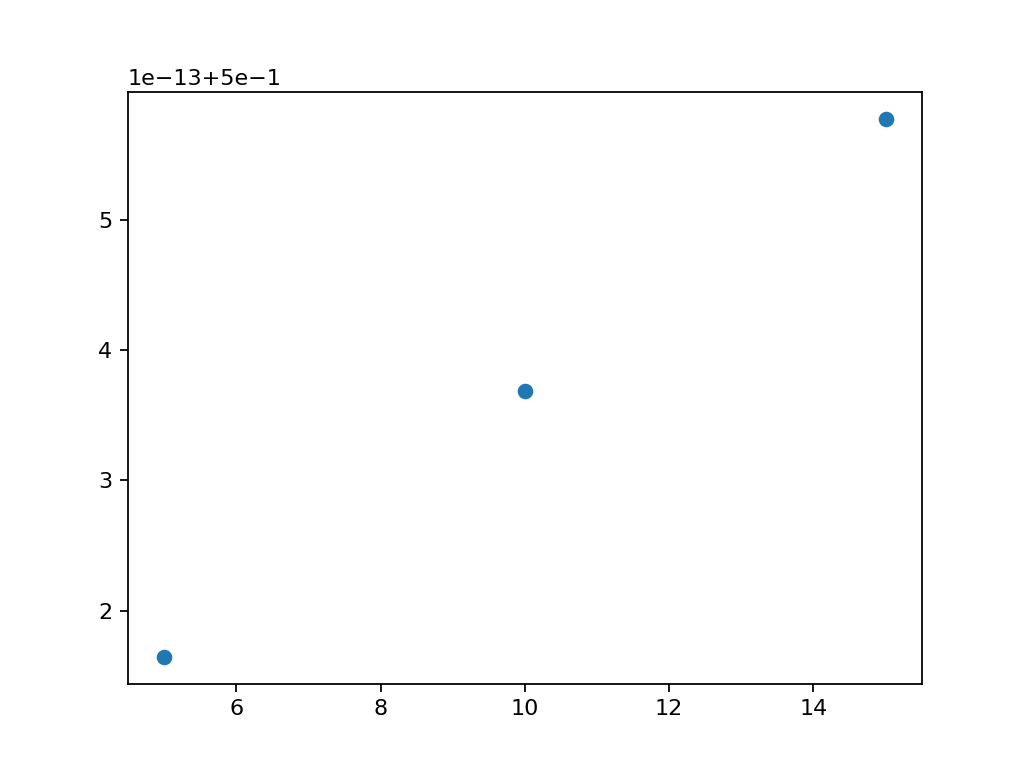

In [52]:
f,ax = plt.subplots()
ax.scatter(xs,ys)
#ax.set_ylim([0,15])

In [32]:
np.diff(ys)/5

array([-18.44141103,  13.21178311])

In [111]:
import sys
sys.path.append('../src/models')
from importlib import reload

In [112]:
import positional as ps

In [113]:
reload(ps)
position = np.array([[0,13,4]])
emb_pos = ps.spatial_encoding(position,10)

0
13
4


In [114]:
emb_pos.shape

torch.Size([1, 60])

In [115]:
emb_pos[0,:20]

tensor([-0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
        -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
        -9.8428e-10, -9.8428e-10, -9.6866e-10, -9.7549e-10, -9.7303e-10,
        -9.7647e-10, -9.7567e-10, -9.7549e-10, -9.7386e-10, -9.7444e-10])

In [117]:
import pickle
with open('../data/processed/daily_pm_southeast.pickle','rb') as f:
    data = pickle.load(f)

<IPython.core.display.Javascript object>


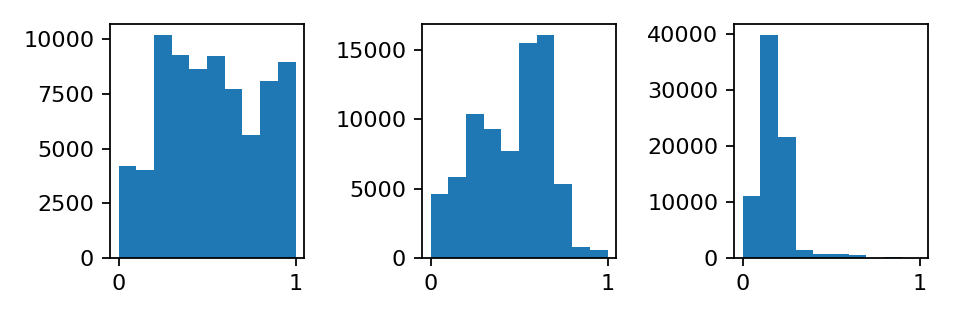

0.0 1.0
0.0 1.0
0.0 1.0


In [118]:
pos = np.array(data['position'])
f,ax = plt.subplots(1,3,figsize=(6,2))
for i in range(3):
    pos[i,:] = (pos[i,:] - np.min(pos[i,:]))/ (np.max(pos[i,:]) - np.min(pos[i,:]))
    ax[i].hist(pos[i,::10])
    print(np.min(pos[i,:]),np.max(pos[i,:]))
    
    

f.tight_layout()


In [108]:
np.sum(pos[2,:]<-3000)

0

<IPython.core.display.Javascript object>


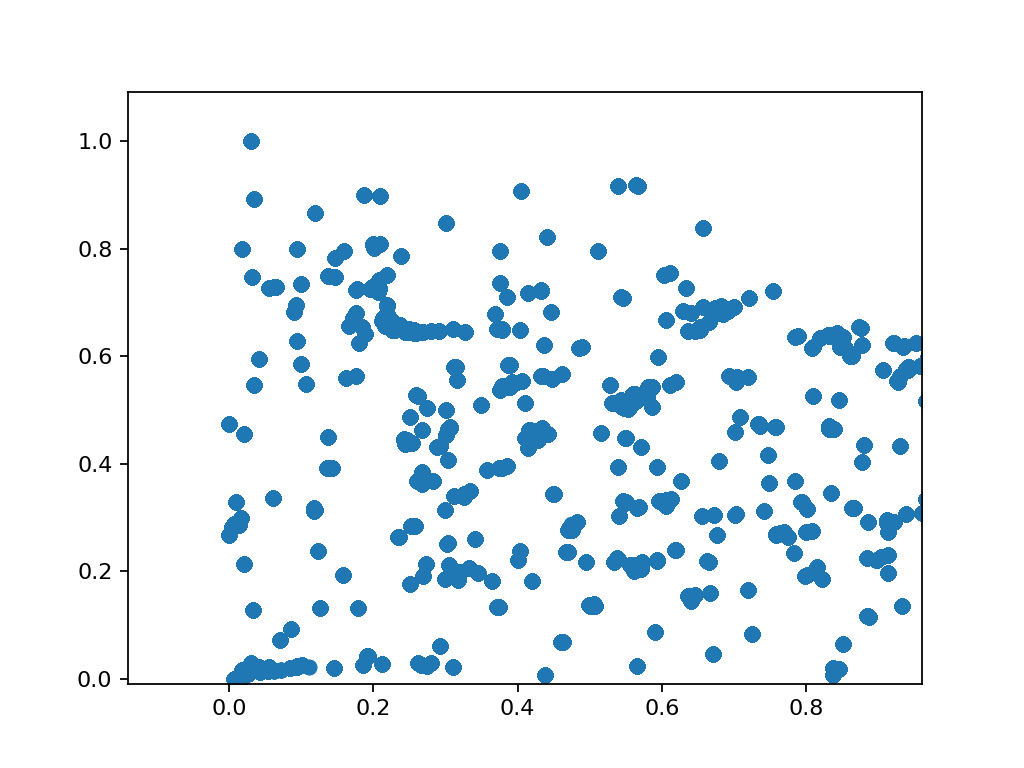

In [119]:
f,ax = plt.subplots()
ax.scatter(pos[0,:],pos[1,:])

In [159]:
reload(ps)
out = ps.spatial_encoding(torch.Tensor(pos[:,:2]).reshape(2,3), 10)


In [145]:
import torch
z = torch.arange(4).unsqueeze(0).repeat_interleave(5,dim=0)
q = torch.rand(5,1)

In [160]:
out

tensor([[ 0.9709,  0.4650, -0.7482, -0.8233,  0.3539,  0.9928,  0.1215, -0.9346,
         -0.5691,  0.6621,  0.2395, -0.8853, -0.6634,  0.5676,  0.9353, -0.1197,
         -0.9926, -0.3557,  0.8223,  0.7494,  0.9709,  0.4650, -0.7482, -0.8233,
          0.3539,  0.9928,  0.1215, -0.9346, -0.5691,  0.6621,  0.2395, -0.8853,
         -0.6634,  0.5676,  0.9353, -0.1197, -0.9926, -0.3557,  0.8223,  0.7494,
          0.1674,  0.3300,  0.4834,  0.6231,  0.7452,  0.8463,  0.9235,  0.9747,
          0.9984,  0.9939,  0.9859,  0.9440,  0.8754,  0.7822,  0.6668,  0.5327,
          0.3835,  0.2235,  0.0572, -0.1107],
        [ 0.1674,  0.3300,  0.4834,  0.6231,  0.7452,  0.8463,  0.9235,  0.9747,
          0.9984,  0.9939,  0.9859,  0.9440,  0.8754,  0.7822,  0.6668,  0.5327,
          0.3835,  0.2235,  0.0572, -0.1107,  0.1748,  0.3442,  0.5031,  0.6464,
          0.7698,  0.8696,  0.9425,  0.9864,  0.9999,  0.9827,  0.9846,  0.9389,
          0.8642,  0.7630,  0.6382,  0.4938,  0.3342,  0.1643, 